In [1]:
import pandas as pd
import numpy as np
import os
from pathlib import Path
from geopy import distance
import matplotlib.pyplot as plt

pd.set_option('max.columns',50)

In [2]:
# set path to github directory
os.chdir('..')

# set path to raw data folder
github_path = Path(os.getcwd())
data_path = github_path / 'data' / 'raw'

In [3]:
# load data frames
airbnb = pd.read_csv(data_path / 'train.csv')
city = pd.read_csv(data_path / 'worldcities.csv')

In [25]:
airbnb.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,city_id
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",2016-06-18,t,t,NaN,2012-03-26,f,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0,1840034016
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,Enjoy travelling during your stay in Manhattan...,2017-08-05,t,f,100%,2017-06-19,t,2017-09-23,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0,1840034016
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,The Oasis comes complete with a full backyard ...,2017-04-30,t,t,100%,2016-10-25,t,2017-09-14,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0,1840034016
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,This light-filled home-away-from-home is super...,NaN,t,t,NaN,2015-04-19,f,NaN,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0,1840021543
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,"Cool, cozy, and comfortable studio located in ...",2015-05-12,t,t,100%,2015-03-01,t,2017-01-22,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0,1840006060


In [5]:
city.head()

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37977000.0,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,34540000.0,1360771077
2,Delhi,Delhi,28.6600,77.2300,India,IN,IND,Delhi,admin,29617000.0,1356872604
3,Mumbai,Mumbai,18.9667,72.8333,India,IN,IND,Mahārāshtra,admin,23355000.0,1356226629
4,Manila,Manila,14.5958,120.9772,Philippines,PH,PHL,Manila,primary,23088000.0,1608618140


In [6]:
airbnb.city.unique()

array(['NYC', 'SF', 'DC', 'LA', 'Chicago', 'Boston'], dtype=object)

In [7]:
# select relevant cities
city_df = city[city['id'].astype('str').isin(['1840034016', '1840020491', '1840000494', 
                                '1840006060', '1840000455', '1840021543'])]
city_df = city_df.rename(columns={'id':'city_id', 'city':'city_name'})
city_df['city_id'] = city_df['city_id'].astype('str')

In [8]:
bnb_city_id = {'NYC':'1840034016', 'SF':'1840021543', 'DC':'1840006060', 
 'LA':'1840020491', 'Chicago':'1840000494', 'Boston':'1840000455'}

airbnb['city_id'] = airbnb['city'].map(bnb_city_id)

In [9]:
train = pd.merge(airbnb, city_df, how='left', on='city_id')

In [10]:
def dist_city_center(prop_lat, prop_lon, city_lat, city_lon):
    prop_coords = (prop_lat, prop_lon)
    city_coords = (city_lat, city_lon)
    dist = distance.great_circle(prop_coords, city_coords).miles
    return dist

In [11]:
train['cc_dist'] = train.apply(lambda x: dist_city_center(x.latitude, x.longitude, x.lat, x.lng), axis=1)

In [12]:
# def num_close_airbnbs(y, train, miles):
#     df = train.copy()
#     df['rel_dist'] = df.apply(lambda x: dist_city_center(y.latitude, y.longitude, x.latitude, x.longitude), axis=1)
#     num_close = df[df['rel_dist']<=miles]
#     return len(num_close)-1

# train['bnb_within_1mi'] = train.apply(lambda y: num_close_airbnbs(y, train, 1), axis=1)

In [13]:
def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
#     m = km * 0.621371
    
    return km

In [14]:
def num_close_airbnbs(y, df, dist_thresh):
    df['cur_lat'] = y.latitude
    df['cur_lon'] = y.longitude
    df['rel_dist'] = haversine_np(df['cur_lon'], df['cur_lat'], df['longitude'], df['latitude'])
    num_close = df[df['rel_dist']<=dist_thresh]
    return len(num_close)-1

In [16]:
# takes ~10 mins to run
df = train.copy()
train['num_bnb_1km'] = train.apply(lambda y: num_close_airbnbs(y, df, 1), axis=1)

# train['num_bnb_3mi'] = train.apply(lambda y: num_close_airbnbs(y, train, 3), axis=1)
# train['num_bnb_5mi'] = train.apply(lambda y: num_close_airbnbs(y, train, 5), axis=1)
# train['num_bnb_10mi'] = train.apply(lambda y: num_close_airbnbs(y, train, 10), axis=1)

# train = train.drop(columns=['cur_lat', 'cur_lon', 'rel_dist'])
# 272

In [21]:
train['amenities'] = train['amenities'].apply(lambda x: set(x))

In [22]:
train['amenities']

0        {:, }, i, e, F, d,  , a, s, n, H, /, f, 0, ,, ...
1        {:, }, i, e, F, d,  , a, s, n, H, /, f, 0, ,, ...
2        {V, :, }, i, e, F, d,  , a, s, n, /, H, f, b, ...
3        {V, }, i, e, F, d,  , a, n, s, /, H, f, b, w, ...
4        {V, }, i, e, F, d,  , a, n, s, H, v, b, ,, h, ...
                               ...                        
74106                                               {{, }}
74107    {V, :, }, i, e, F, d,  , a, n, s, H, /, f, b, ...
74108    {V, }, i, e, F, d,  , a, n, s, /, H, M, f, v, ...
74109    {V, }, i, e, d,  , a, s, n, H, f, b, w, ,, h, ...
74110    {V, }, i, e, F, d,  , a, 2, n, s, H, /, f, b, ...
Name: amenities, Length: 74111, dtype: object

In [16]:
train['desc_len'] = train['description'].str.len()
train['name_len'] = train['name'].str.len()

In [17]:
train.head(1)

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,city_id,city_name,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,cc_dist,num_bnb_1km,desc_len,name_len
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",2016-06-18,t,t,NaN,2012-03-26,f,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0,1840034016,New York,New York,40.6943,-73.9249,United States,US,USA,New York,NaN,18713220.0,3.498384,272,211,30


## Split train into train-val

In [18]:
from sklearn.model_selection import train_test_split

In [60]:
X = train

In [61]:
X_num = X[['accommodates', 'bathrooms', 'number_of_reviews',
        'review_scores_rating', 'bedrooms', 'beds', 'cc_dist', 'num_bnb_1km', 'desc_len', 'name_len']]
X_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74111 entries, 0 to 74110
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   accommodates          74111 non-null  int64  
 1   bathrooms             73911 non-null  float64
 2   number_of_reviews     74111 non-null  int64  
 3   review_scores_rating  57389 non-null  float64
 4   bedrooms              74020 non-null  float64
 5   beds                  73980 non-null  float64
 6   cc_dist               74111 non-null  float64
 7   num_bnb_1km           74111 non-null  int64  
 8   desc_len              74111 non-null  int64  
 9   name_len              74111 non-null  int64  
dtypes: float64(5), int64(5)
memory usage: 6.2 MB


In [62]:
X_cat = X[['property_type', 'room_type', 'bed_type', 'cancellation_policy', 'cleaning_fee']]

In [63]:
from sklearn.preprocessing import OneHotEncoder
X_cat = pd.DataFrame(OneHotEncoder().fit_transform(X_cat).toarray())

In [64]:
reponse = X[['log_price']]

In [65]:
X = pd.concat([X_cat, X_num, reponse],axis=1)

In [66]:
X = X.dropna()

In [67]:
y = X[['log_price']]
X = X.drop(columns=['log_price'])

In [68]:
# X = X.drop(columns=['cc_dist','num_bnb_1km', 'desc_len', 'name_len'])

In [69]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=0)

## Models

Initial estimate of models for rough draft. No longer relevant, information here can be discarded.

In [70]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

### Linear Regression

In [71]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [72]:
print('Train R^2', lr.score(X_train,y_train))
print('Val R^2', lr.score(X_val,y_val))

Train R^2 0.6028384400660629
Val R^2 0.6154352749416918


In [82]:
mean_squared_error(y_train, lr.predict(X_train))

0.1770543815779367

In [73]:
y_pred_lr = lr.predict(X_val)
mean_squared_error(y_val, y_pred_lr)

0.17351610503405562

### Random Forest Regressor

In [84]:
rf = RandomForestRegressor(max_depth=5)
rf.fit(X_train, y_train)

/Users/nikhilbhargava/opt/anaconda3/envs/mids-python/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(max_depth=5)

In [85]:
#r^2
print('Train R^2', rf.score(X_train,y_train))
print('Val R^2', rf.score(X_val,y_val))

Train R^2 0.6182284307372543
Val R^2 0.6250475267043517


In [86]:
mean_squared_error(y_train, rf.predict(X_train))

0.1701935331080313

In [87]:
y_pred_rf = rf.predict(X_val)
mean_squared_error(y_val, y_pred_rf)

0.1691790445139817

### Neural Net Regressor

In [91]:
nn = MLPRegressor(learning_rate_init=0.05)
nn.fit(X_train, y_train)

/Users/nikhilbhargava/opt/anaconda3/envs/mids-python/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MLPRegressor(learning_rate_init=0.05)

In [92]:
#nn
print('Train R^2', nn.score(X_train,y_train))
print('Val R^2', nn.score(X_val,y_val))

Train R^2 0.5984543622823195
Val R^2 0.6091849853064051


In [94]:
mean_squared_error(y_train, nn.predict(X_train))

0.1790088007843659

In [95]:
y_pred_nn = nn.predict(X_val)
mean_squared_error(y_val, y_pred_nn)

0.17633624386162297

### Visualize Train

In [2]:
# load data
airbnb = pd.read_csv('../data/raw/us-train.csv')

In [8]:
# load log price of data
airbnb['price'] = np.exp(airbnb['log_price'])

In [56]:
# distribution of cities
airbnb.groupby(['city'])['id'].count()

city
Boston      3468
Chicago     3719
DC          5688
LA         22453
NYC        32349
SF          6434
Name: id, dtype: int64

In [53]:
bnb_mean = airbnb.groupby(['city'])['price'].mean().sort_values(ascending=False).to_dict()
# bnb_med = airbnb.groupby(['city'])['price'].median().sort_values(ascending=True).to_dict()
bnb_med = {'SF': 165, 'DC':125, 'Boston':136, 'LA':100, 'NYC':105, 'Chicago':99}

labels = list(bnb_mean.keys())
bnb_mean = np.array(list(bnb_mean.values()))
bnb_med = np.array(list(bnb_med.values()))
bnb_mean = np.around(bnb_mean).astype(int)
bnb_med = np.around(bnb_med).astype(int)

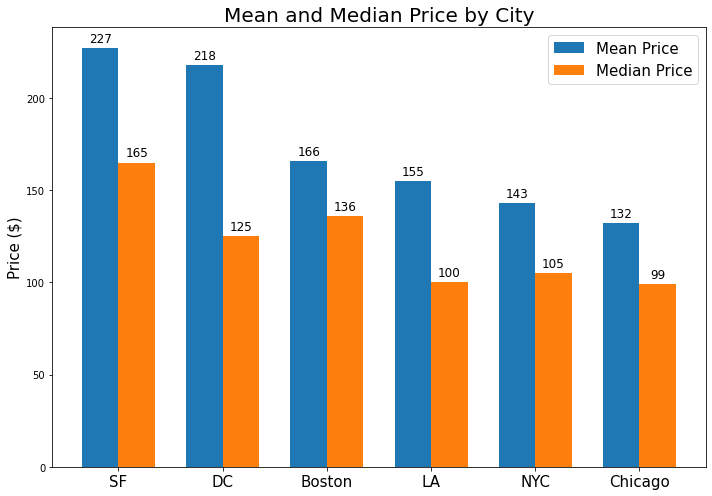

In [54]:
# plot mean and median of airbnb data
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize = (10, 7))
rects1 = ax.bar(x - width/2, bnb_mean, width, label='Mean Price')
rects2 = ax.bar(x + width/2, bnb_med, width, label='Median Price')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Price ($)', fontsize=15)
ax.set_title('Mean and Median Price by City', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=15)
ax.legend(fontsize=15)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12)


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()